# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv("craftcans.csv", na_values=["Does not apply"])

## How many rows do you have in the data? What are the column types?

In [3]:
df.shape

(2416, 7)

In [4]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

In [5]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [6]:
print("A couple of tie-scores in there:")
print(df.Brewery.value_counts().head(15))

A couple of tie-scores in there:
Brewery Vivant                     62
Oskar Blues Brewery                46
Sun King Brewing Company           38
Cigar City Brewing Company         25
Sixpoint Craft Ales                24
Hopworks Urban Brewery             23
Stevens Point Brewery              22
Great Crescent Brewery             20
21st Amendment Brewery             20
SanTan Brewing Company             19
Bonfire Brewing Company            19
Upslope Brewing Company            18
Anderson Valley Brewing Company    18
Tallgrass Brewing Company          18
Great River Brewery                18
Name: Brewery, dtype: int64


## What is the most common ABV? (alcohol by volume)

In [7]:
df.ABV.mode()

0    5.00%
dtype: object

In [8]:
# df.ABV.hist(bins=114, figsize=(18,5))

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [9]:
df.ABV.head(10)

0     4.50%
1     4.90%
2     4.80%
3     6.00%
4     6.00%
5     5.60%
6     8.00%
7    12.50%
8     7.70%
9     4.20%
Name: ABV, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [10]:
df['ABV'] = df.ABV.str.replace("%","")

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [11]:
df.ABV = df.ABV.astype(float)

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [12]:
df.ABV.describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

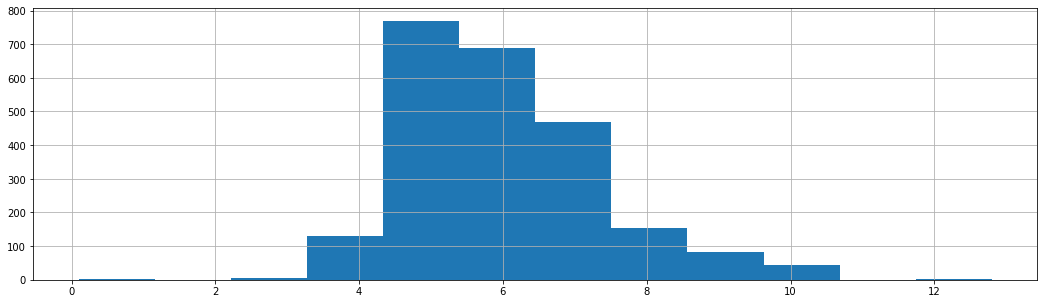

In [13]:
df.ABV.hist(bins=12, figsize=(18,5))

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [14]:
df.ABV.isnull().value_counts()

False    2348
True       68
Name: ABV, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [15]:
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [16]:
df[df.Location == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most cans of beer?

In [17]:
df.Brewery[df.Location == 'Brooklyn, NY'].max()

'Sixpoint Craft Ales'

In [18]:
df.Brewery[df.Location == 'Brooklyn, NY'].value_counts().head(1)

Sixpoint Craft Ales    24
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [19]:
df.Style[df.Brewery == 'Sixpoint Craft Ales'].value_counts().head(6)

American IPA                      4
German Pilsener                   2
Baltic Porter                     2
American Double / Imperial IPA    2
Rye Beer                          2
Cream Ale                         2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [20]:
df.Brewery[df.Location.str.contains("NY$", na=False)].value_counts()

Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Blue Point Brewing Company        4
Butternuts Beer and Ale           4
The Bronx Brewery                 3
KelSo Beer Company                3
Upstate Brewing Company           2
Bomb Beer Company                 2
Montauk Brewing Company           2
Chatham Brewing                   2
Dundee Brewing Company            1
Southampton Publick House         1
Newburgh Brewing Company          1
The Manhattan Brewing Company     1
Name: Brewery, dtype: int64

### Now *count* all of the breweries in New York state

In [21]:
df.Location[df.Location.str.contains("NY$", na=False)].value_counts()

Brooklyn, NY         38
Utica, NY            13
Patchogue, NY         4
Garrattsville, NY     4
Bronx, NY             3
New York, NY          3
Chatham, NY           2
Montauk, NY           2
Elmira, NY            2
Newburgh, NY          1
Southampton, NY       1
Rochester, NY         1
Name: Location, dtype: int64

In [22]:
df.Location[df.Location.str.contains("NY$", na=False)].value_counts().sum()

74

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [23]:
df.Style[df.Style.str.contains(".*IPA.*", na=False)].value_counts()

American IPA                      424
American Double / Imperial IPA    105
Belgian IPA                        18
English India Pale Ale (IPA)       13
American White IPA                 11
Name: Style, dtype: int64

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [24]:
# df.IBUs.mean()

In [25]:
df.IBUs.value_counts().head()

20.0    82
35.0    60
65.0    54
30.0    53
70.0    48
Name: IBUs, dtype: int64

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [26]:
df.IBUs.mean().round()

43.0

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

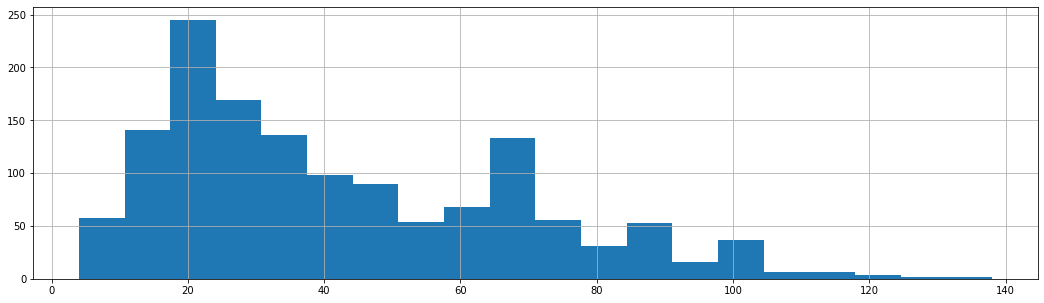

In [27]:
df.IBUs.hist(bins=20, figsize=(18,5))

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [28]:
df.IBUs.describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [29]:
df[df.IBUs >= 64].sort_values(by='IBUs', ascending=False)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1662,Bitter Bitch Imperial IPA,Astoria Brewing Company,"Astoria, OR",American Double / Imperial IPA,12 oz.,8.2,138.0
989,Troopers Alley IPA,Wolf Hills Brewing Company,"Abingdon, VA",American IPA,12 oz.,5.9,135.0
611,Dead-Eye DIPA,Cape Ann Brewing Company,"Gloucester, MA",American Double / Imperial IPA,16 oz.,9.0,130.0
249,Bay of Bengal Double IPA (2014),Christian Moerlein Brewing Company,"Cincinnati, OH",American Double / Imperial IPA,12 oz.,8.9,126.0
1537,Heady Topper,The Alchemist,"Waterbury, VT",American Double / Imperial IPA,16 oz.,8.0,120.0
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0
2182,Heady Topper,The Alchemist,"Waterbury, VT",American Double / Imperial IPA,16 oz.,8.0,120.0
556,More Cowbell,Buffalo Bayou Brewing Company,"Houston, TX",American Double / Imperial IPA,16 oz.,9.0,118.0
1783,On the Wings of Armageddon,DC Brau Brewing Company,"Washington, DC",American Double / Imperial IPA,12 oz.,9.2,115.0
218,Hopkick Dropkick,Burn 'Em Brewing,"Michigan City, IN",American Double / Imperial IPA,12 oz.,9.9,115.0


## List all of the beers with IBUs below the 25th percentile

In [30]:
df[df.IBUs <= 21].sort_values(by='IBUs', ascending=True)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1860,Summer Solstice Cerveza Crema (2009),Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.6,4.0
2339,Summer Solstice (2011),Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.6,4.0
1303,Summer Solstice,Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.6,4.0
1903,Devils Tramping Ground Tripel,Aviator Brewing Company,"Fuquay-Varina, NC",Tripel,12 oz.,9.2,5.0
169,Yo Soy Un Berliner,Freetail Brewing Company,"San Antonio, TX",Berliner Weissbier,12 oz.,4.4,5.0
318,18th Anniversary Gose,Real Ale Brewing Company,"Blanco, TX",Gose,12 oz.,4.4,5.0
1061,Chickawawa Lemonale,Great River Brewery,"Davenport, IA",Fruit / Vegetable Beer,12 oz.,5.0,5.0
1340,Westbrook Gose,Westbrook Brewing Company,"Mt. Pleasant, SC",Gose,12 oz.,4.0,5.0
2064,Winter Solstice,Anderson Valley Brewing Company,"Boonville, CA",Winter Warmer,12 oz.,6.9,6.0
313,Mr. Blue Sky,Griffin Claw Brewing Company,"Birmingham, MI",American Pale Wheat Ale,16 oz.,4.5,6.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [31]:
df.groupby(by='Style').IBUs.median().sort_values(ascending=False).dropna()

Style
American Barleywine                    96.0
Russian Imperial Stout                 94.0
American Double / Imperial IPA         91.0
American Double / Imperial Pilsner     85.0
American Black Ale                     73.0
Belgian Strong Dark Ale                72.0
American Strong Ale                    70.0
American IPA                           69.0
English Stout                          66.0
American India Pale Lager              65.0
Belgian IPA                            61.0
English Barleywine                     60.0
Rye Beer                               57.0
Baltic Porter                          52.0
English Strong Ale                     52.0
American Double / Imperial Stout       51.0
English India Pale Ale (IPA)           47.0
American White IPA                     45.0
American Pale Ale (APA)                44.0
Extra Special / Strong Bitter (ESB)    41.0
California Common / Steam Beer         41.0
Old Ale                                40.0
American Stout            

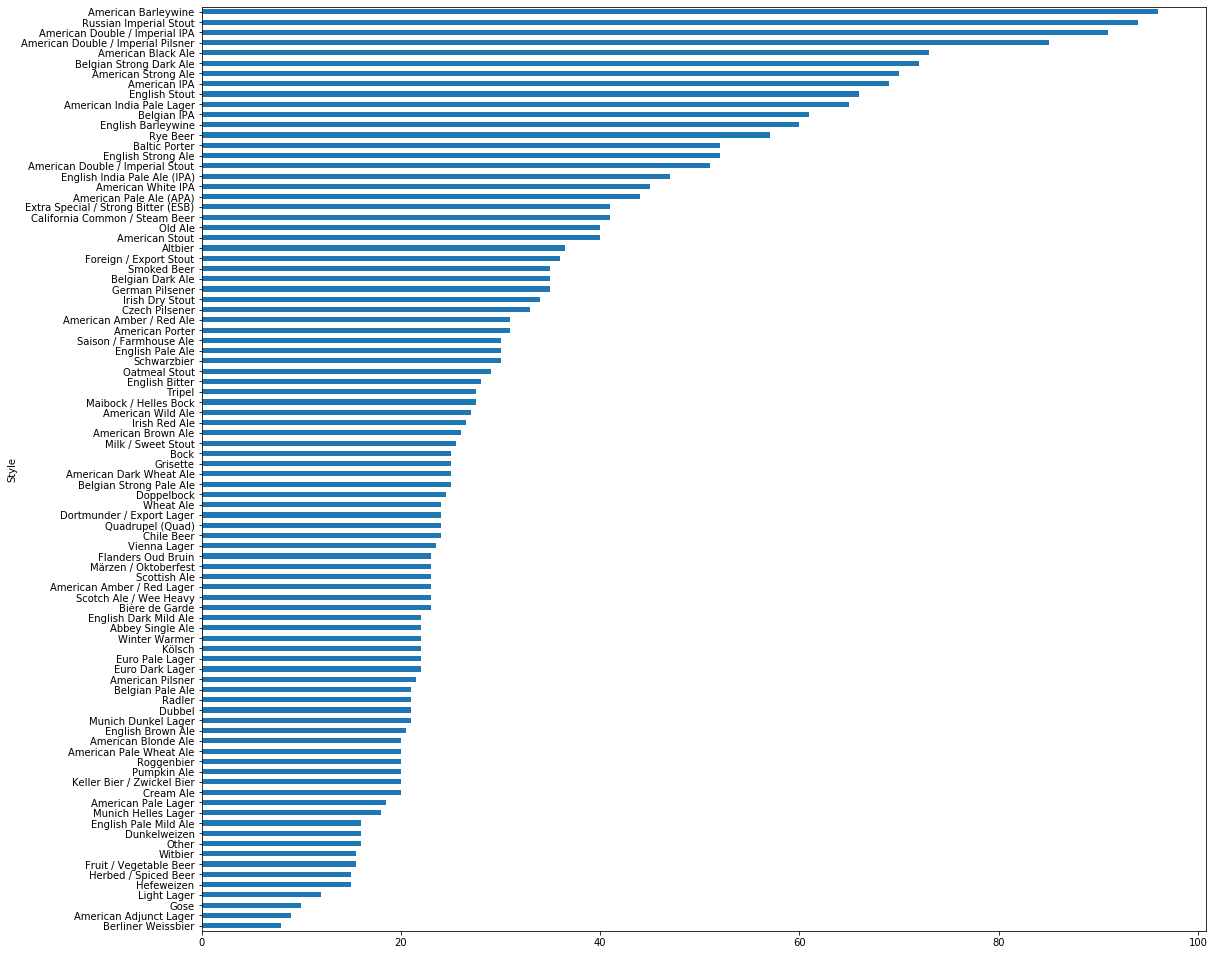

In [32]:
df.groupby(by='Style').IBUs.median().sort_values(ascending=True).dropna().plot(kind='barh', figsize=(18,17))

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [33]:
df[df.IBUs >= 64].groupby(by='Style').IBUs.median().sort_values(ascending=False).head(8)

Style
Russian Imperial Stout                 98.0
American Barleywine                    96.0
Extra Special / Strong Bitter (ESB)    93.0
American Double / Imperial IPA         93.0
Rye Beer                               85.0
American Double / Imperial Pilsner     85.0
Baltic Porter                          85.0
American Double / Imperial Stout       85.0
Name: IBUs, dtype: float64

In [34]:
df[df.IBUs <= 21].groupby(by='Style').IBUs.median().sort_values(ascending=False).head(11)

Style
Czech Pilsener            21.0
Irish Red Ale             21.0
Milk / Sweet Stout        20.0
Pumpkin Ale               20.0
Chile Beer                20.0
Euro Dark Lager           20.0
German Pilsener           20.0
Belgian Pale Ale          20.0
Dubbel                    20.0
Saison / Farmhouse Ale    20.0
Roggenbier                20.0
Name: IBUs, dtype: float64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [2]:
Wheats = ["Witbier","Hefeweizen","American Pale Wheat Ale","Berliner Weissbier","Gose","Kristalweizen"]
df[df['Style'].isin(Wheats)].IBUs.mean().round()

NameError: name 'df' is not defined

In [36]:
df[df['Style'].isin(Wheats)].groupby(by='Style').IBUs.mean().round().sort_values(ascending=False)

Style
American Pale Wheat Ale    21.0
Hefeweizen                 18.0
Witbier                    16.0
Gose                        9.0
Berliner Weissbier          8.0
Kristalweizen               NaN
Name: IBUs, dtype: float64

## Draw a histogram of the IBUs of those beers

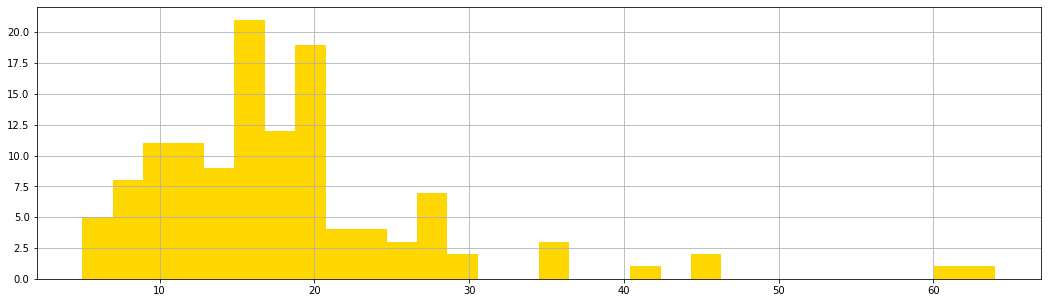

In [37]:
df[df['Style'].isin(Wheats)].IBUs.dropna().hist(bins=30, color='gold', figsize=(18,5))

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [38]:
df[df.Style.str.contains(".*IPA.*", na=False)].IBUs.mean().round()

72.0

In [39]:
df[df.Style.str.contains(".*IPA.*", na=False)].groupby(by='Style').IBUs.mean().round().sort_values(ascending=False)

Style
American Double / Imperial IPA    93.0
American IPA                      68.0
Belgian IPA                       57.0
English India Pale Ale (IPA)      55.0
American White IPA                49.0
Name: IBUs, dtype: float64

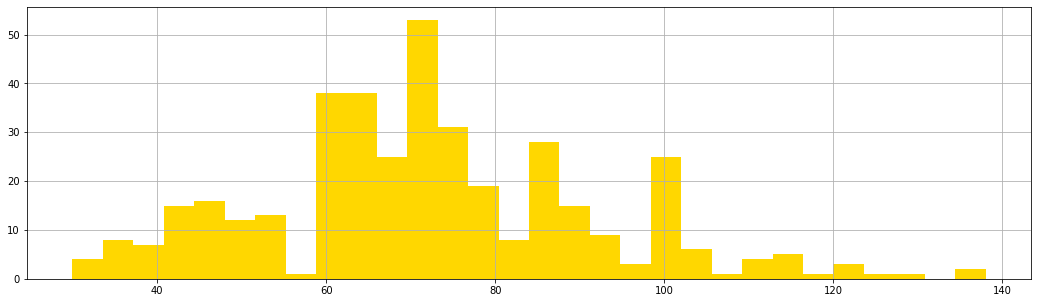

In [40]:
df[df.Style.str.contains(".*IPA.*", na=False)].IBUs.dropna().hist(bins=30, color='gold', figsize=(18,5))

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

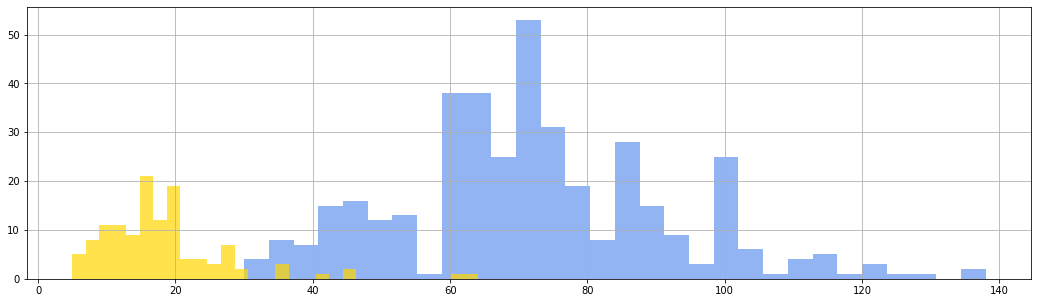

In [41]:
ax = df[df.Style.str.contains(".*IPA.*", na=False)].IBUs.dropna().hist(alpha=0.7, bins=30, color='cornflowerblue')
ax = ax, df[df['Style'].isin(Wheats)].IBUs.dropna().hist(alpha=0.7, bins=30, color='gold', figsize=(18,5))

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

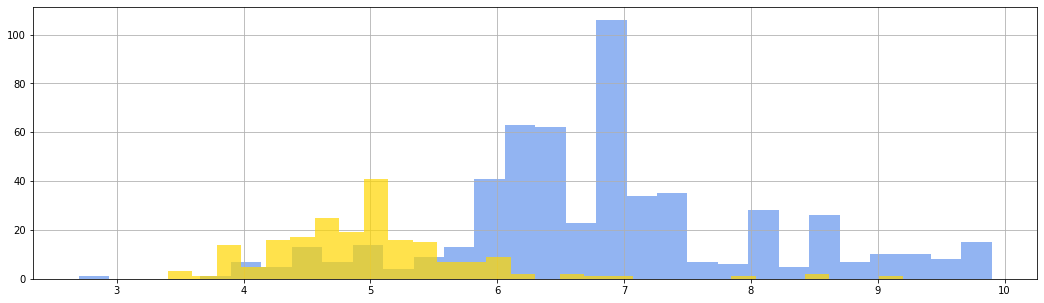

In [42]:
ax = df[df.Style.str.contains(".*IPA.*", na=False)].ABV.dropna().hist(alpha=0.7, bins=30, color='cornflowerblue', zorder=1)
ax = ax, df[df['Style'].isin(Wheats)].ABV.dropna().hist(alpha=0.7, bins=30, color='gold', zorder=2, figsize=(18,5))

## Good work!

If you made it this far you deserve a drink.